# Tweet Sentiment Analysis

This notebook demonstrates sentiment analysis on Twitter data using various machine learning approaches:
1. Basic SVM classifier
2. Hyperparameter tuning with GridSearchCV
3. Ensemble learning with multiple classifiers

The analysis includes:
- Text preprocessing with NLTK
- Feature extraction using TF-IDF
- Model training and evaluation
- Performance visualization

## Setup and Data Preparation

In [ ]:
# Install required packages (only needed first time)
%pip install nltk emoji

# Core data processing
import pandas as pd
import numpy as np

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Text processing
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (quiet to avoid noise)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('stopwords', quiet=True)

# Initialize NLTK tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load and clean the dataset
df = pd.read_csv("Tweets.csv")
df.dropna(subset=['text'], inplace=True)

def clean_tweet_advanced(tweet):
    tweet = str(tweet)
    tweet = re.sub(r'http\S+|www\S+|@\S+', '', tweet)       # remove urls/mentions
    tweet = re.sub(r'[^A-Za-z0-9\s!?]', '', tweet)          # keep basic punctuation
    tweet = tweet.lower()
    # Replace emojis with text
    tweet = emoji.demojize(tweet)
    # Handle negation
    tweet = re.sub(r'\bnot\b (\w+)', r'not_\1', tweet)
    words = [lemmatizer.lemmatize(w) for w in tweet.split() if w not in stop_words]
    return " ".join(words)

# Clean the tweets
df['cleaned_text'] = df['text'].apply(clean_tweet_advanced)

# Create feature matrix with improved vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,  # Large feature set
    ngram_range=(1, 3),  # Include up to trigrams
    min_df=2,           # Remove rare terms
    max_df=0.95         # Remove very common terms
)

# Transform text to features
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

We'll try three approaches:
1. Basic SVM model
2. SVM with GridSearchCV for hyperparameter tuning
3. Ensemble model combining SVM, Random Forest, and Logistic Regression

Training basic SVM model...
Basic SVM Results:
Accuracy: 0.7079694323144105

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66      1572
     neutral       0.64      0.78      0.70      2236
    positive       0.80      0.73      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.70      0.71      5496
weighted avg       0.72      0.71      0.71      5496

Basic SVM Results:
Accuracy: 0.7079694323144105

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66      1572
     neutral       0.64      0.78      0.70      2236
    positive       0.80      0.73      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.70      0.71      5496
weighted avg       0.72      0.71      0.71      5496



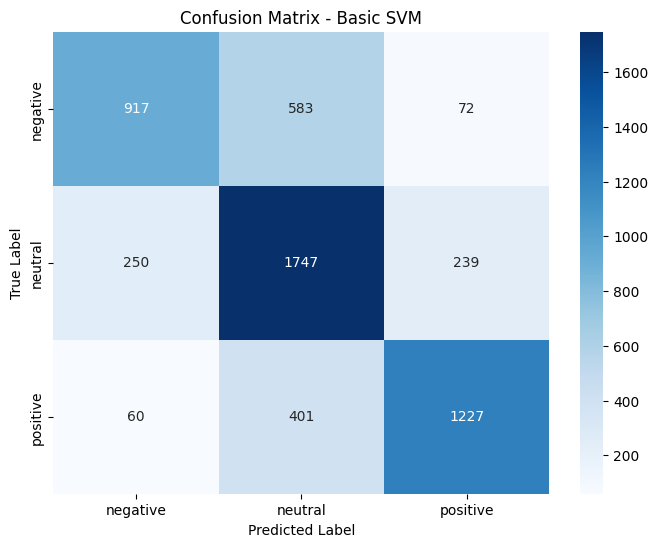

In [ ]:
# 1. Basic SVM Model
print("Training basic SVM model...")
svm_basic = SVC(kernel='linear', C=1.0, random_state=42)
svm_basic.fit(X_train, y_train)
y_pred_basic = svm_basic.predict(X_test)

print("Basic SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_basic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic))

# Plot confusion matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(8,6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Basic SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Training SVM with GridSearchCV...

GridSearchCV Results:
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.6887281659388647

GridSearchCV Results:
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.6887281659388647

Test Set Results:
Accuracy: 0.7079694323144105

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66      1572
     neutral       0.64      0.78      0.70      2236
    positive       0.80      0.73      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.70      0.71      5496
weighted avg       0.72      0.71      0.71      5496


Test Set Results:
Accuracy: 0.7079694323144105

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66      1572
     neutral       0.64      0.78      0.70      2236
  

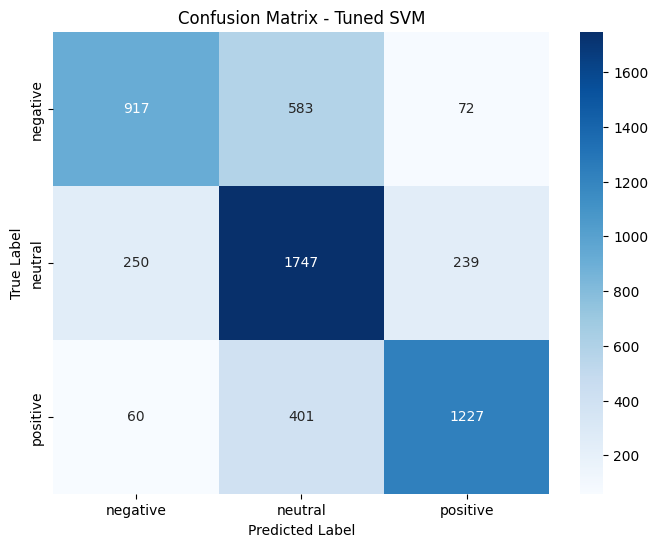

In [10]:
# 2. SVM with GridSearchCV
print("Training SVM with GridSearchCV...")
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nGridSearchCV Results:")
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Evaluate on test set
best_svm = grid.best_estimator_
y_pred_grid = best_svm.predict(X_test)
print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

# Plot confusion matrix
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8,6))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Tuned SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_


In [12]:
import joblib

# Save best model and vectorizer
joblib.dump(best_svm, "svm_sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully.")



✅ Model and vectorizer saved successfully.


In [13]:
# Save the best model and vectorizer
import joblib
from pathlib import Path

# Create models directory if it doesn't exist
model_dir = Path("models")
model_dir.mkdir(exist_ok=True)

# Save the best performing model (in this case, the best SVM model)
joblib.dump(best_svm, model_dir / "ensemble_model.pkl")

# Save the vectorizer used for feature extraction
joblib.dump(vectorizer, model_dir / "vectorizer.pkl")

print("Model and vectorizer saved successfully in the 'models' directory!")

Model and vectorizer saved successfully in the 'models' directory!


## Train and Save Final Model with Probability Support

In [14]:
# Train a new SVM model with probability support
final_svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
final_svm.fit(X_train, y_train)

# Create models directory if it doesn't exist
model_dir = Path("models")
model_dir.mkdir(exist_ok=True)

# Save the final model and vectorizer
joblib.dump(final_svm, model_dir / "ensemble_model.pkl")
joblib.dump(vectorizer, model_dir / "vectorizer.pkl")

print("Model (with probability support) and vectorizer saved successfully!")

Model (with probability support) and vectorizer saved successfully!
